# Data Mining Lab Report 2
#### NAME: TEAN JIN HE
#### MATRIC ID: SD21063
#### SECTION: 02G

### CASE STUDY:
Regression is a data mining technique used to predict a range of numeric values (also called continuous
values), given a particular dataset. Regression is used across multiple industries for business and marketing
planning, financial forecasting, environmental modelling and analysis of trends. For this laboratory report,
you’ll use the advertising dataset that you can find from any sources’ websites such as UCI Machine Learning
Repository, Kaggle and etc.
Ideally, you perform a data mining process to do prediction using a linear algorithm. Detail regarding the
attributes involved are as follows:

- Attribute information for Advertising.csv dataset:
1. Unnamed: 0
2. TV Radio
3. Newspaper
4. Sales


### Question 1
#### *General Knowledge*

#### Discuss the linear regression implementation related to manufacturing applications as discussed above. Give reference/ references.

Linear regression is a statistical method that can be used to model the relationship between one or more independent variables (also called predictors or features) and a dependent variable (also called response or outcome). In manufacturing applications, linear regression can be used to predict various outcomes based on the input variables, such as product quality, demand, maintenance, cost, etc. For example, some possible applications which are predictive maintenance, quality control, demand forecasting and workforce analytics.

Based on predictive maintenance, linear regression can be used to analyze the relationship between equipment performance indicators (such as temperature, vibration, noise, etc.) and the risk of failure. By using historical data, linear regression can estimate the optimal maintenance schedule and prevent breakdowns. 

Based on quality control, linear regression can be used to monitor the quality of products and processes by measuring the impact of different factors (such as raw materials, temperature, humidity, pressure, etc.) on the quality attributes (such as dimensions, strength, color, etc.). By using linear regression, manufacturers can identify the optimal settings for the factors and ensure the quality standards are met.

Based on demand forecasting, linear regression can be used to forecast the demand for products based on the historical sales data and other variables (such as seasonality, price, promotions, competitors, etc.). By using linear regression, manufacturers can plan their production, inventory, and distribution accordingly and optimize their revenue and profit.

Based on workforce analytics, linear regression can be used to analyze the relationship between employee performance and various factors (such as skills, training, motivation, satisfaction, etc.). By using linear regression, manufacturers can identify the key drivers of employee productivity and retention and design effective human resource strategies.

References:
- Lauzier, J. (2020). Predictive Analytics in Manufacturing: Use Cases and Benefits. Www.machinemetrics.com. https://www.machinemetrics.com/blog/predictive-analytics-in-manufacturing
- Kaur, H., & Kumar, A. (2017). Application of linear regression analysis for quality control in manufacturing industry. International Journal of Engineering and Management Research, 7(6), 1-5. https://www.ijemr.net/DOC/ApplicationOfLinearRegressionAnalysisForQualityControlInManufacturingIndustry.pdf
- Choudhary, A. K., Harding, J. A., & Tiwari, M. K. (2009). Data mining in manufacturing: a review based on the kind of knowledge. Journal of intelligent manufacturing, 20(5), 501-521. https://link.springer.com/article/10.1007/s10845-008-0145-x 
- Rasmussen, T., & Ulrich, D. (2015). Learning from practice: how HR analytics avoids being a management fad. Organizational Dynamics, 44(3), 236-242. https://www.sciencedirect.com/science/article/abs/pii/S0090261615000379

### Question 2
#### *Python*

### a.Import related libraries and load the dataset

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import Dataset
data_Advertising = pd.read_csv('Advertising.csv')
data_Advertising

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### b. Explore the dataset using interactive EDA. Check and solve the noise in the dataset

In [3]:
# Check total number of attributes
print("No. of Attributes (Columns): ",len(data_Advertising.columns))
print("No. of sample (Rows): ",len(data_Advertising))

No. of Attributes (Columns):  5
No. of sample (Rows):  200


In [4]:
data_Advertising.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
# to drop 1st column (Unnamed: 0), zero index based
data_Advertisingnew = data_Advertising.drop(columns=data_Advertising.columns[0])
data_Advertisingnew

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
data_Advertisingnew.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [7]:
#Check duplicated rows
data_Advertisingnew[data_Advertisingnew.duplicated(keep=False)]

,TV,Radio,Newspaper,Sales


There is no duplicated data in this dataset.

In [8]:
#Identify Missing Values

data_Advertisingnew.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There is no null data in this dataset.

### EDA

### 1. YData Profiling (Previously Pandas Profiling)

### Interactive and Comprehensive Descriptive Analysis using Pandas-Profiling

In [9]:
import ydata_profiling as pp
#Interactive and comprehensive EDA/ data description

# forming ProfileReport and save
# as output.html file
profile = pp.ProfileReport(data_Advertisingnew)
profile.to_file("output_raw_data.html")

D:\anaconda\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
D:\anaconda\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 2. D-Tale

In [10]:
import dtale

dtale.show(data_Advertisingnew)

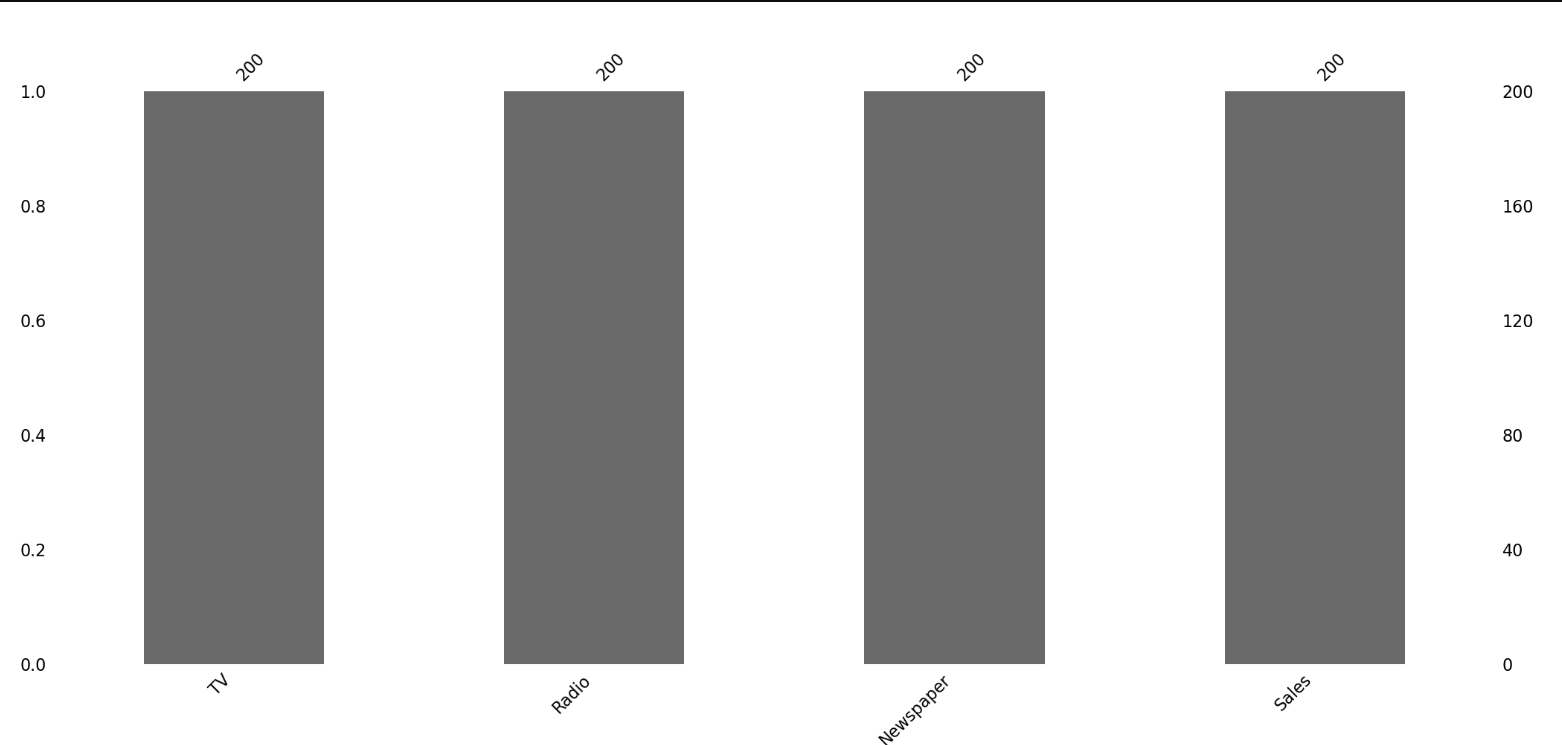

In [11]:
from PIL import Image
image1 = Image.open("missingno.png")
image1

Based on the graph above, there is no missing value in this dataset

### c. Set the input attributes and target attributes (Advertising.csv = Sales)

In [12]:
# Set input attributes (X) and target attribute (y)
X = data_Advertisingnew.iloc[:, :-1].values
y = data_Advertisingnew.iloc[:, -1].values

Input attributes: TV, Radio, Newspaper

Target attribute: Sales

### d. Partition the datasets into training and testing sets with 80:20. Discuss the requirement to do data partitioning in developing the model

In [13]:
#data partitioning (80:20) Training =80%, Testing =20%

from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data partitioning is crucial to assess how well your model generalizes to new, unseen data.
# The training set is used to train the model, and the testing set is used to evaluate its performance.
# It helps in detecting overfitting and ensures the model's performance on unseen data.

In [14]:
X_train

array([[116. ,   7.7,  23.1],
       [177. ,   9.3,   6.4],
       [ 43.1,  26.7,  35.1],
       [ 62.3,  12.6,  18.3],
       [224. ,   2.4,  15.6],
       [ 38.2,   3.7,  13.8],
       [ 70.6,  16. ,  40.8],
       [147.3,  23.9,  19.1],
       [104.6,   5.7,  34.4],
       [ 76.3,  27.5,  16. ],
       [ 78.2,  46.8,  34.5],
       [168.4,   7.1,  12.8],
       [  8.7,  48.9,  75. ],
       [  7.8,  38.9,  50.6],
       [ 76.4,   0.8,  14.8],
       [129.4,   5.7,  31.3],
       [ 73.4,  17. ,  12.9],
       [289.7,  42.3,  51.2],
       [ 19.6,  20.1,  17. ],
       [197.6,   3.5,   5.9],
       [284.3,  10.6,   6.4],
       [184.9,  21. ,  22. ],
       [112.9,  17.4,  38.6],
       [ 23.8,  35.1,  65.9],
       [290.7,   4.1,   8.5],
       [ 19.4,  16. ,  22.3],
       [293.6,  27.7,   1.8],
       [ 18.7,  12.1,  23.4],
       [134.3,   4.9,   9.3],
       [ 25.6,  39. ,   9.3],
       [100.4,   9.6,   3.6],
       [ 80.2,   0. ,   9.2],
       [188.4,  18.1,  25.6],
       [17

### e. Train linear regression algorithm for training sets. Explain the model developed.

In [15]:
# Develop model 

from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

Each feature's coefficients, also known as weights, and an intercept are part of the linear regression model. The model's prediction for a given collection of features (X) may be obtained by using the learned coefficients to generate a linear combination of the feature values and then adding the intercept.

### f. Use the linear regression models to predict test sets.

In [16]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

### g. Evaluate the model using 2 R and MSE for linear regression and interpret the results.

In [17]:
import statsmodels.formula.api as sm
result = sm.ols("Sales~TV+Radio+Newspaper", data=data_Advertisingnew).fit()

In [18]:
#print result.summary()
print (result.rsquared, result.rsquared_adj)

0.8972106381789522 0.8956373316204668


In [19]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.58e-96
Time:                        00:25:42   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

Score for R^2 is 0.8972. The independent variables (TV, radio, newspaper) account for 89.72% of the variation in the dependent variable (sales).

In [20]:
from sklearn.metrics import mean_squared_error 

print('MSE (built-in function):', round(mean_squared_error(y_test, y_pred),4))

err = np.matrix(y_test-y_pred)
print('MSE (computed):%.4f' % (err*err.T/err.shape[1]))

MSE (built-in function): 3.1741
MSE (computed):3.1741


The average squared difference (MSE) between the actual and projected values is a measurement. It measures the model's overall accuracy. The outcome displays the same MSE value (3.1741) for both manual computation and built-in function.

Interpretation:
- R-squared (2 R) measures the proportion of the variance in the dependent variable (Sales) that is predictable 
- from the independent variables (TV, Radio, Newspaper). It ranges from 0 to 1, and higher values indicate a better fit.
- MSE is a measure of the average squared difference between predicted and actual values. Lower values are better.

### h. Predict for new data.

In [21]:
data_Advertisingnew

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [22]:
# To predict new data using LR model

print(model.predict([[230.1,37.8,69.2]]))
print(model.predict([[250.1,40.8,72.2]]))
print(model.predict([[180.8,10.8,58.4]]))

[20.61397147]
[22.08443033]
[13.27071976]


### Actual data

Compare the sales forecast findings with the real data. Since the expected and actual results are greater, it is possible to increase sales in real time.